In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_excel

In [84]:
#sensor data
df=pd.read_csv("sensor9ab_for_project1.csv")
df.head()

,Unnamed: 0,created_at,entry_id,PM1.0_CF_ATM_ug.m3,PM2.5_CF_ATM_ug.m3,PM10.0_CF_ATM_ug.m3,UptimeMinutes,ADC,Temperature_F,Humidity_.
0,1,1/24/18 17:56,40,1.84,2.03,2.29,5,-79,79.0,15.0
1,2,1/24/18 17:58,42,1.95,2.08,2.08,8,-79,79.0,15.0
2,3,1/24/18 18:02,43,1.00,2.02,2.45,12,-78,80.0,14.0
3,4,1/24/18 18:04,44,0.95,1.11,1.82,13,-79,80.0,14.0
4,5,1/24/18 18:06,46,0.66,1.58,1.58,16,-82,80.0,14.0


In [85]:
data=df

#change the format of date and time column
data["created_at"] = pd.to_datetime(data["created_at"])#.dt.date

#change timezone from UTC to Los Angeles time
data["created_at"] = data["created_at"].dt.tz_localize("UTC").dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)


#November data
#subsetting the dataframe one week before and one week after the wildfire
mask = (data['created_at'] > "2018-11-01") & (data['created_at'] <= "2018-11-20")
sub_data=data.loc[mask]

#remove the time part, leave only date
sub_data["created_at"] = pd.to_datetime(sub_data["created_at"]).dt.date
sub_data=sub_data.groupby("created_at").mean()


#compare data
#subsetting the dataframe one week before and one week after the wildfire
mask = (data['created_at'] > "2018-03-01") & (data['created_at'] <= "2018-03-30")
sub_data2=data.loc[mask]

#remove the time part, leave only date
sub_data2["created_at"] = pd.to_datetime(sub_data2["created_at"]).dt.date
sub_data2=sub_data2.groupby("created_at").mean()


sub_data.head(20)




/Users/amy/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/amy/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,entry_id,PM1.0_CF_ATM_ug.m3,PM2.5_CF_ATM_ug.m3,PM10.0_CF_ATM_ug.m3,UptimeMinutes,ADC,Temperature_F,Humidity_.
created_at,,,,,,,,,
2018-11-01,199622.0,300846.232915,12.933096,16.990809,18.176918,776.437936,-80.794979,75.008368,38.956764
2018-11-02,200328.5,301910.520115,13.732543,17.626724,18.755934,246.471264,-80.765805,77.491379,41.033046
2018-11-03,201025.5,302964.495702,19.415817,25.251361,26.738940,610.057307,-80.259312,76.408309,45.945559
2018-11-04,201736.0,304034.802213,26.321189,36.635934,39.173983,556.405256,-80.412172,74.550484,52.990318
2018-11-05,202444.5,305111.793948,22.593732,38.096671,43.298761,273.407781,-80.178674,74.301153,59.253602
2018-11-06,203129.0,306155.841481,10.307185,14.091037,15.227852,219.780741,-80.253333,74.964444,54.773333
2018-11-07,203807.5,307210.868035,13.193812,18.730279,20.069208,779.903226,-80.963343,73.020528,58.461877
2018-11-08,204501.0,308261.971631,18.338128,30.852440,34.492057,708.114894,-80.974468,73.551773,46.316312
2018-11-09,205208.0,309332.392102,6.005388,8.068011,8.803794,378.210155,-81.212976,75.039492,13.527504


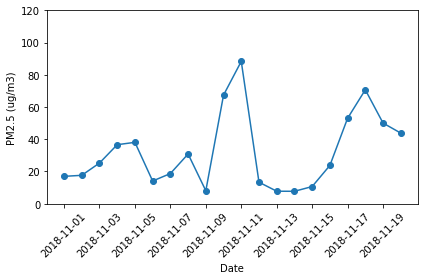

In [86]:
sub_data=sub_data.dropna(how="any")
sub_data=sub_data.reset_index()

PM25_11 = sub_data['PM2.5_CF_ATM_ug.m3']
Date_11=sub_data["created_at"]


plt.plot(Date_11,PM25_11,marker="o")

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("PM2.5 (ug/m3)")
plt.ylim(0,120)
plt.tight_layout()
plt.savefig('air_nov.png',dpi=1000)






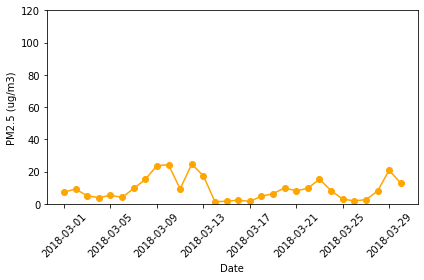

In [87]:
sub_data2=sub_data2.dropna(how="any")
sub_data2=sub_data2.reset_index()

PM25_3 = sub_data2['PM2.5_CF_ATM_ug.m3']
Date_3=sub_data2["created_at"]
plt.plot(Date_3,PM25_3,color="orange",marker="o")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("PM2.5 (ug/m3)")
plt.ylim(0,120)

plt.tight_layout()
plt.savefig('air_mar.png',dpi=1000)